## Use regex to clean data
data: https://en.wikipedia.org/wiki/List_of_unicorn_startup_companies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print(f'pandas version: {pd.__version__}')

pandas version: 1.1.3


In [2]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_unicorn_startup_companies'
                  , match='Valuation', header=0)
len(dfs)

2

In [3]:
df = dfs[0]
df.head()

,Company,Valuation (US $billion),Valuation date,Industry,Country/region
0,Ant Group,150,April 2018[11],Technology,China
1,ByteDance,140,March 2020[12],Internet,China
2,Stripe,95,March 2021[13],Financial services,US
3,SpaceX,74,February 2021[14],Aerospace,US
4,DiDi,62,July 2019[12],Transportation,China


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Company                  440 non-null    object
 1   Valuation (US $billion)  440 non-null    object
 2   Valuation date           440 non-null    object
 3   Industry                 322 non-null    object
 4   Country/region           440 non-null    object
dtypes: object(5)
memory usage: 17.3+ KB


In [5]:
df[df['Valuation (US $billion)'].str.contains('\[')]

,Company,Valuation (US $billion),Valuation date,Industry,Country/region
231,Podium,1.5[203],August 2019[204],Software,US


In [6]:
df['aa'] = df['Valuation (US $billion)'].str.replace('\[.*\]\.', '')
df

,Company,Valuation (US $billion),Valuation date,Industry,Country/region,aa
0,Ant Group,150,April 2018[11],Technology,China,150
1,ByteDance,140,March 2020[12],Internet,China,140
2,Stripe,95,March 2021[13],Financial services,US,95
3,SpaceX,74,February 2021[14],Aerospace,US,74
4,DiDi,62,July 2019[12],Transportation,China,62
...,...,...,...,...,...,...
435,JoyTunes,1+,June 2021[360],Music,Israel,1+
436,Amber Group,1+,June 2021[361],Cryptocurrency,Hong Kong,1+
437,Hailo,1+,June 2021[362],Electronics,Israel,1+
438,Grofers,1+,June 2021[363],Retail,India,1+


In [7]:
df[df['Valuation (US $billion)'].str.contains('\+')]

,Company,Valuation (US $billion),Valuation date,Industry,Country/region,aa
69,Collibra,5+,January 2019[76],NaN,Belgium,5+
109,Rappi,3+,April 2019[113],Transportation,Colombia,3+
110,Wildlife,3+,August 2020[114],Mobile games,Brazil,3+
155,Eightfold.ai,2.1+,June 2021[153],Artificial intelligence,US,2.1+
161,Babylon Health,2+,August 2019[159],Healthcare,UK,2+
...,...,...,...,...,...,...
435,JoyTunes,1+,June 2021[360],Music,Israel,1+
436,Amber Group,1+,June 2021[361],Cryptocurrency,Hong Kong,1+
437,Hailo,1+,June 2021[362],Electronics,Israel,1+
438,Grofers,1+,June 2021[363],Retail,India,1+


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Company                  440 non-null    object
 1   Valuation (US $billion)  440 non-null    object
 2   Valuation date           440 non-null    object
 3   Industry                 322 non-null    object
 4   Country/region           440 non-null    object
 5   aa                       440 non-null    object
dtypes: object(6)
memory usage: 20.8+ KB


In [9]:
df['bb'] = pd.to_datetime(df['Valuation date'].str.replace('\[.*\]', ''))
df

,Company,Valuation (US $billion),Valuation date,Industry,Country/region,aa,bb
0,Ant Group,150,April 2018[11],Technology,China,150,2018-04-01
1,ByteDance,140,March 2020[12],Internet,China,140,2020-03-01
2,Stripe,95,March 2021[13],Financial services,US,95,2021-03-01
3,SpaceX,74,February 2021[14],Aerospace,US,74,2021-02-01
4,DiDi,62,July 2019[12],Transportation,China,62,2019-07-01
...,...,...,...,...,...,...,...
435,JoyTunes,1+,June 2021[360],Music,Israel,1+,2021-06-01
436,Amber Group,1+,June 2021[361],Cryptocurrency,Hong Kong,1+,2021-06-01
437,Hailo,1+,June 2021[362],Electronics,Israel,1+,2021-06-01
438,Grofers,1+,June 2021[363],Retail,India,1+,2021-06-01


In [10]:
df['Valuation date'] = pd.to_datetime(df['Valuation date'].str.replace('\[.*\]', ''))
df

,Company,Valuation (US $billion),Valuation date,Industry,Country/region,aa,bb
0,Ant Group,150,2018-04-01,Technology,China,150,2018-04-01
1,ByteDance,140,2020-03-01,Internet,China,140,2020-03-01
2,Stripe,95,2021-03-01,Financial services,US,95,2021-03-01
3,SpaceX,74,2021-02-01,Aerospace,US,74,2021-02-01
4,DiDi,62,2019-07-01,Transportation,China,62,2019-07-01
...,...,...,...,...,...,...,...
435,JoyTunes,1+,2021-06-01,Music,Israel,1+,2021-06-01
436,Amber Group,1+,2021-06-01,Cryptocurrency,Hong Kong,1+,2021-06-01
437,Hailo,1+,2021-06-01,Electronics,Israel,1+,2021-06-01
438,Grofers,1+,2021-06-01,Retail,India,1+,2021-06-01


In [11]:
df['Valuation (US $billion)'] = pd.to_numeric(df['Valuation (US $billion)'].str.replace('(\[.*\]\.|[^\d\.])', ''))
df

,Company,Valuation (US $billion),Valuation date,Industry,Country/region,aa,bb
0,Ant Group,150.0,2018-04-01,Technology,China,150,2018-04-01
1,ByteDance,140.0,2020-03-01,Internet,China,140,2020-03-01
2,Stripe,95.0,2021-03-01,Financial services,US,95,2021-03-01
3,SpaceX,74.0,2021-02-01,Aerospace,US,74,2021-02-01
4,DiDi,62.0,2019-07-01,Transportation,China,62,2019-07-01
...,...,...,...,...,...,...,...
435,JoyTunes,1.0,2021-06-01,Music,Israel,1+,2021-06-01
436,Amber Group,1.0,2021-06-01,Cryptocurrency,Hong Kong,1+,2021-06-01
437,Hailo,1.0,2021-06-01,Electronics,Israel,1+,2021-06-01
438,Grofers,1.0,2021-06-01,Retail,India,1+,2021-06-01


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Company                  440 non-null    object        
 1   Valuation (US $billion)  440 non-null    float64       
 2   Valuation date           440 non-null    datetime64[ns]
 3   Industry                 322 non-null    object        
 4   Country/region           440 non-null    object        
 5   aa                       440 non-null    object        
 6   bb                       440 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 24.2+ KB


In [13]:
df.drop(columns=['aa', 'bb'], inplace=True)
df

,Company,Valuation (US $billion),Valuation date,Industry,Country/region
0,Ant Group,150.0,2018-04-01,Technology,China
1,ByteDance,140.0,2020-03-01,Internet,China
2,Stripe,95.0,2021-03-01,Financial services,US
3,SpaceX,74.0,2021-02-01,Aerospace,US
4,DiDi,62.0,2019-07-01,Transportation,China
...,...,...,...,...,...
435,JoyTunes,1.0,2021-06-01,Music,Israel
436,Amber Group,1.0,2021-06-01,Cryptocurrency,Hong Kong
437,Hailo,1.0,2021-06-01,Electronics,Israel
438,Grofers,1.0,2021-06-01,Retail,India


In [18]:
df.groupby('Country/region').describe()

Valuation (US $billion)                              \
                                          count       mean        std   min   
Country/region                                                                
Argentina                                   1.0   1.050000        NaN  1.05   
Argentina / US                              1.0   1.920000        NaN  1.92   
Australia                                   4.0   5.200000   6.550318  1.60   
Austria                                     2.0   1.435000   0.332340  1.20   
Belgium                                     1.0   5.000000        NaN  5.00   
Brazil                                     12.0   4.045833   8.229312  1.00   
Canada                                     15.0   1.983333   1.855462  1.00   
China                                      88.0   6.661591  22.389546  1.00   
China / Hong Kong                           2.0   7.000000   7.071068  2.00   
China / US                                  1.0   5.000000        NaN  5.00   
Colombia                                    1.0   3.000000        NaN  3.00   
Croatia / UK                                1.0   1.000000        NaN  1.00   
Estonia                                     2.0   1.000000   0.000000  1.00   
France                                     12.0   1.410833   0.498315  1.00   
Germany                                     7.0   3.314286   3.517778  1.00   
Germany / Russia                            1.0   1.200000        NaN  1.20   
Hong Kong                                   5.0   1.000000   0.000000  1.00   
India                                      42.0   3.080952   3.453029  1.00   
India / Singapore                           1.0   1.000000        NaN  1.00   
India / US                                  9.0   1.766667   0.855862  1.00   
Indonesia                                   6.0   5.700000   2.985297  2.90   
Israel                                     11.0   1.290909   0.486733  1.00   
Israel / US                                 7.0   1.307143   0.367909  1.00   
Japan                                       6.0   1.558333   0.897873  1.00   
Latvia                                      1.0   1.000000        NaN  1.00   
Lithuania                                   1.0   1.400000        NaN  1.40   
Luxembourg                                  1.0   1.000000        NaN  1.00   
Mexico                                      3.0   2.733333   1.101514  2.00   
Netherlands                                 2.0   4.750000   2.474874  3.00   
Nigeria                                     1.0   1.000000        NaN  1.00   
Norway                                      1.0   1.600000        NaN  1.60   
Philippines                                 1.0   1.000000        NaN  1.00   
Portugal / US                               3.0   3.933333   4.823208  1.00   
Republic of Ireland                         2.0   1.100000   0.141421  1.00   
Singapore                                   3.0   5.333333   7.505553  1.00   
Singapore / Israel                          1.0   1.100000        NaN  1.10   
Singapore / Switzerland                     1.0   1.000000        NaN  1.00   
South Korea                                10.0   2.207000   1.364755  1.00   
Spain                                       2.0   1.200000   0.282843  1.00   
Sweden                                     10.0   6.870000  13.810467  1.00   
Switzerland                                 6.0   2.400000   2.324651  1.00   
Thailand                                    1.0   1.000000        NaN  1.00   
Turkey                                      1.0   7.560000        NaN  7.56   
UAE                                         2.0  15.500000  20.506097  1.00   
UK                                         19.0   3.150526   3.209604  1.00   
US                                        126.0   5.583018  11.802095  1.00   
US / Israel                                 3.0   1.416667   0.520416  1.00   
Vietnam                                     1.0   1.500000        NaN  1.5

In [19]:
df.describe()

,Valuation (US $billion)
count,440.000000
mean,4.440205
std,12.365432
min,1.000000
25%,1.000000
50%,1.600000
75%,3.000000
max,150.000000


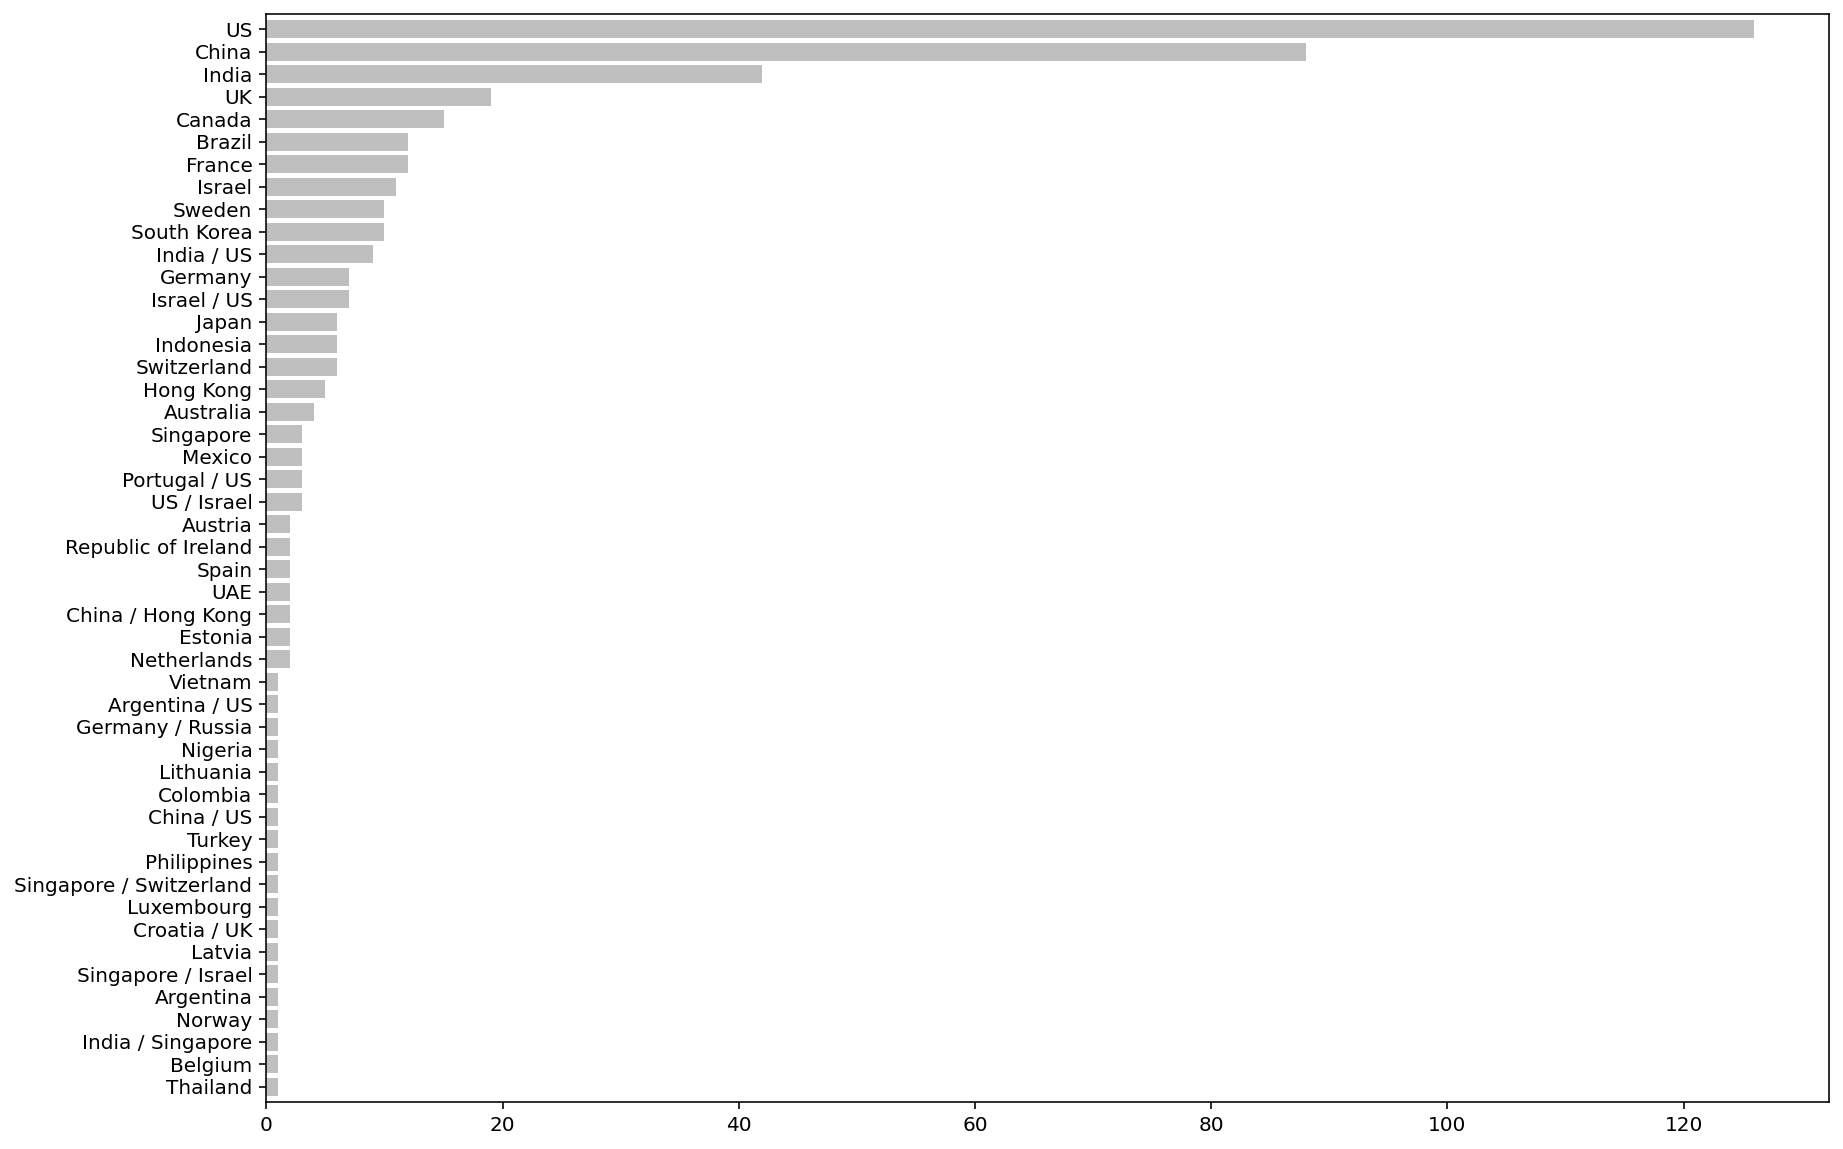

In [30]:
plt.figure(figsize=(14,10))
df['Country/region'].value_counts().sort_values(ascending=True).plot(kind='barh', color='0.75', width=0.8);